In [1]:
import time
import numpy as np
from scipy import signal
from itertools import product
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [13]:
# Gaussian
def fct_Gauss(x,esp,sig):
    return (1/(np.sqrt(2*np.pi)*sig))*np.exp(-0.5*(x-esp)**2/sig**2)
def fct_Gauss_bis(x,esp,sig):
    return np.exp(-0.5*(x-esp)**2/sig**2)

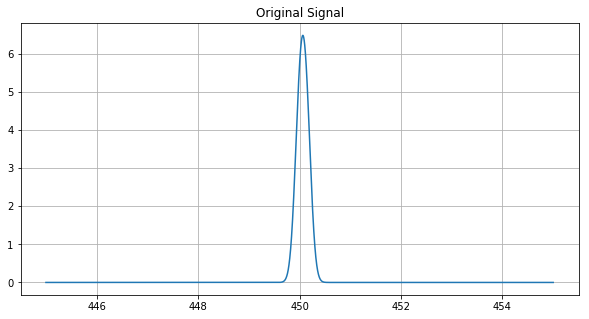

In [69]:
# Create a very narrow Gaussian incoming signal
sig_in = 0.1 # start with a small fixed variance
n = 10000     # many steps to make the gaussian extremly narrow but not too many cuz time
n_pic = 2     # number of peaks in the signal
wavelength = np.linspace(445,455,n)
distance = np.linspace(450,450+cste*Sigma_conv,n_pic)    # distance between 2 peaks : 5nm
fi = np.zeros(n)
for i in distance:
    fi += fct_Gauss(wavelength,i,sig_in) 
plt.figure(figsize=[10,5])
plt.title("Original Signal")
plt.plot(wavelength,fi)
plt.grid(True)

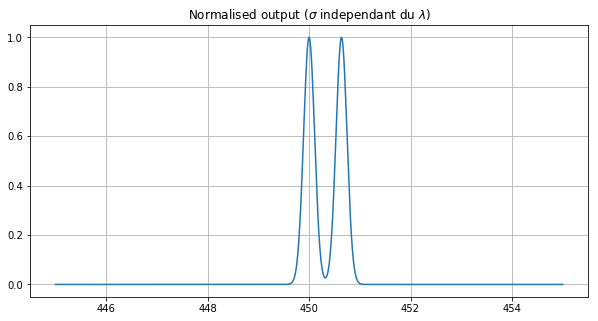

Time used: 12.227108716964722
contrast: [0.94849102]


In [67]:
start = time. time() 
R = 5000 # make a constant resolution, a small one to be less resolved
dLam = 500/R
sigma = dLam / np.sqrt(8*np.log(2))
res_cste = np.zeros(n)
for i in range(n):
    fv = fct_Gauss(wavelength,wavelength[i],sigma)
    res_cste += fi[i]*fv

res_cste=res_cste/np.max(res_cste) # normalise

plt.figure(figsize=[10,5])
plt.title('Normalised output ($\sigma$ independant du $\lambda$)')
#plt.title('($\sigma$ independant du $\lambda$)')
plt.plot(wavelength,res_cste) #,label='$\sigma$ independant du $\lambda$')
plt.grid(True)
plt.show()

end = time. time()
print('Time used:',end - start)
# Contrast
x_min_loc = signal.argrelmin(res_cste)[0]
f_min_loc = res_cste[x_min_loc]
x_peaks = signal.find_peaks(res_cste)[0][0]
f_peaks = res_cste[x_peaks]
contrast = (f_peaks - f_min_loc) / (f_peaks + f_min_loc)
print('contrast:',contrast)

# Convolution
f(x) = $\frac{1}{\sqrt{2π}\sigma_1}\mathrm{e}^\frac{-(x-\mu_1)^{2}}{2π\sigma_1^{2}}$ ;
g(x) = $\frac{1}{\sqrt{2π}\sigma_2}\mathrm{e}^\frac{-(x-\mu_2)^{2}}{2π\sigma_2^{2}}$ <br>
convolution: f(x)*g(x) = $\int_{-\infty}^\infty f(x-\tau)g(\tau) d\tau $ <br>
$\sigma_{conv} = \sqrt{\sigma_1^{2}+\sigma_2^{2}}$

In [68]:
distance_value = cste*Sigma_conv
sigma_1 = sig_in #distance_value / np.sqrt(8*np.log(2))
Sigma_conv = np.sqrt(sigma_1**2+sigma**2)
print('Distance between 2 peaks:',distance_value)
print('Sigma of input:', sigma_1)
print('Sigma of Gauss:', sigma)
print('Sigma of convolution:',Sigma_conv)
# Contrast
x_min_loc = signal.argrelmin(res_cste)[0]
f_min_loc = res_cste[x_min_loc]
x_peaks = signal.find_peaks(res_cste)[0][0]
f_peaks = res_cste[x_peaks]
contrast = (f_peaks - f_min_loc) / (f_peaks + f_min_loc)
print('contrast:',contrast)

Distance between 2 peaks: 0.6393230792311403
Sigma of input: 0.1
Sigma of Gauss: 0.04246609001440096
Sigma of convolution: 0.10864330996941876
contrast: [0.94849102]


In [6]:
np.sqrt(8*np.log(2))

2.3548200450309493

In [7]:
np.sqrt(2)*0.43

0.6081118318204309

In [8]:
0.1/np.sqrt(2*np.log(2)-1)

0.16089435818455816

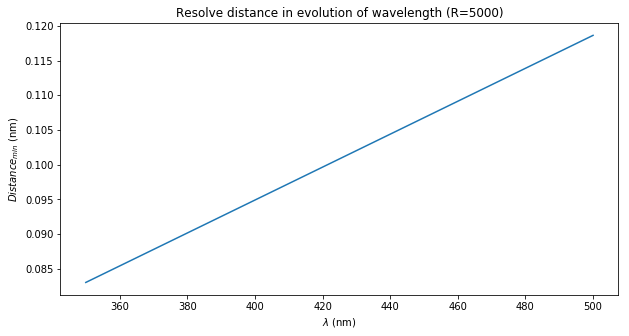

In [47]:
R = 5000
wavelength = np.linspace(350,500,n)
d = []
for i in wavelength:
    d.append(np.sqrt(-8*np.log(0.377))/np.sqrt(8*np.log(2))*i/R)
    
plt.figure(figsize=[10,5])
plt.title("Resolve distance in evolution of wavelength (R=5000)")
plt.plot(wavelength,d)
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("$Distance_{min}$ (nm)")
plt.show()

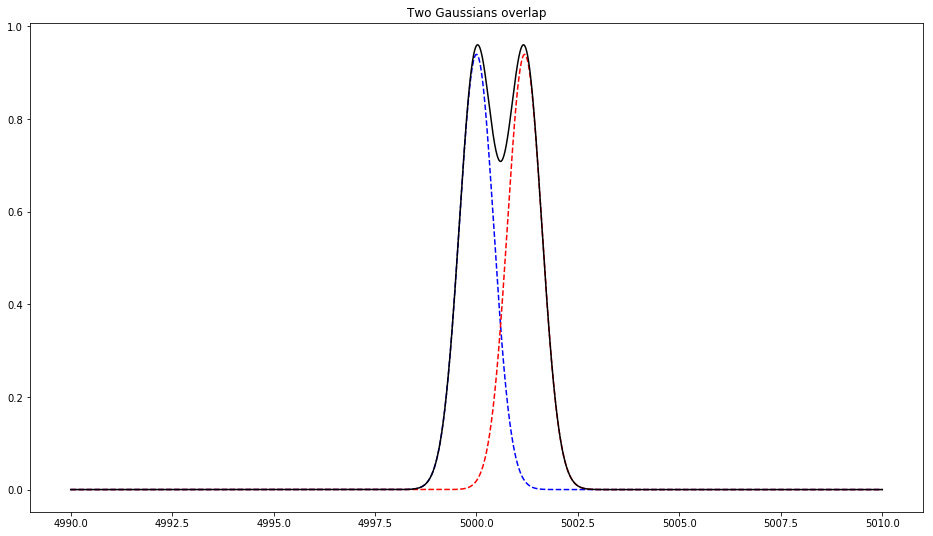

contrast: [0.15089458]


In [52]:
R = 5000 # resolution
lam = 5000 # wavelength [Ångström]
dlam = lam/R
sig = dlam/np.sqrt(8*np.log(2))
esp1 = 5000
k = np.sqrt(-np.log(0.37703)*8) # From calculation on paper
distance = k*sig
esp2 = esp1 + distance
n = 10000
wavelength = np.linspace(4990,5010,n)
g1 = fct_Gauss(wavelength,esp1,sig)
g2 = fct_Gauss(wavelength,esp2,sig)
g = g1 + g2
plt.figure(figsize=[16,9])
plt.title('Two Gaussians overlap')
plt.plot(wavelength,g1,'--b')
plt.plot(wavelength,g2,'--r')
plt.plot(wavelength,g,'k')
plt.show()
x_min_loc = signal.argrelmin(g)[0]
f_min_loc = g[x_min_loc]
x_peak = signal.find_peaks(g)[0][0]
f_peak = g[x_peak]
C = (f_peak - f_min_loc)/(f_peak + f_min_loc)
print('contrast:', C)

In [64]:
k

2.79346454296922

In [65]:
cste = np.sqrt(-8*np.log(0.377))/np.sqrt(8*np.log(2))

In [70]:
cste

1.1863235525746856